# GMM con Scikit-learn

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [2]:
# TODO: Importa la clase GaussianMixture de sklearn
from sklearn.mixture import GaussianMixture

# TODO: Inicializar y entrenar el modelo GaussianMixture con 3 clusters
gmm = GaussianMixture(n_components=3, random_state=1234)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [3]:
# TODO: Obtener a que cluster pertenece cada dato
y_gmm = gmm.predict(X)

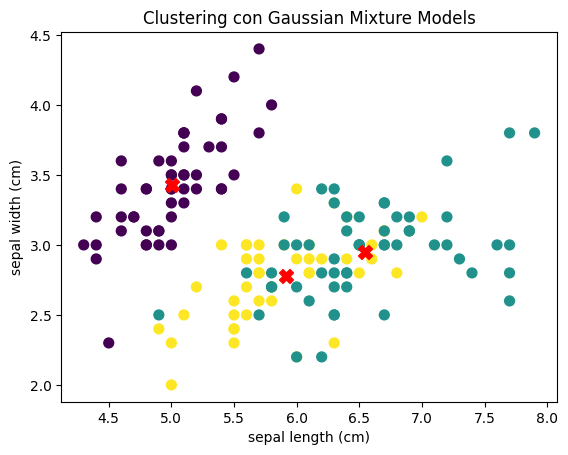

In [15]:
import matplotlib.pyplot as plt

# TODO: Visualiza los clusters para las primeras dos dimensiones y sus centros. Sigue los siguientes pasos:

# TODO: Paso 1: Obtener los centroides
# TIP: En GMM es la media del cluster
centers = gmm.means_

# TODO: Paso 2: Pinta un scatter de las dos primeras dimensiones de X (valores reales)
# y dale un color según su predicción
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap="viridis")

# TODO: Paso 3: Pinta otro scatter con los centroides.
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100, marker="X")

plt.title("Clustering con Gaussian Mixture Models")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Obtener el número óptimo de clusters para GMM

In [5]:
iris = load_iris()
X = iris.data

In [6]:
aics = []
bics = []

n_components_range = range(1, 11)
for n_components in n_components_range:
    # TODO: Instancia un GaussianMixture que se ejecute cada vez con el número de clusters correspondiente.
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(X)

    # TODO: Añade a la lista "aics" el valor de aic en cada iteración.
    # TIP: Consulta las funciones de la clase GaussianMixture
    aics.append(gmm.aic(X))
    # TODO: Añade a la lista "bics" el valor de bic en cada iteración.
    # TIP: Consulta las funciones de la clase GaussianMixture
    bics.append(gmm.bic(X))

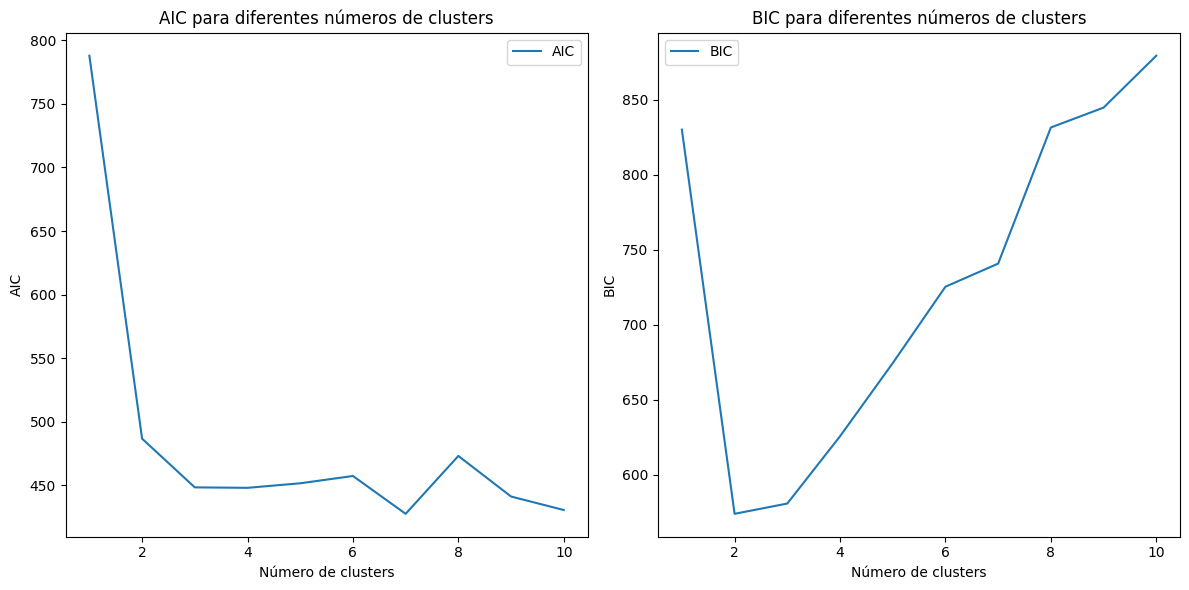

In [8]:
plt.figure(figsize=(12, 6))

# TODO: Imprime el gráfico para visualizar dónde está el número óptimo de clusters
# según el AIC.
# TIP: Completa solo los huecos marcados con "______"
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aics, label="AIC")
plt.title("AIC para diferentes números de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("AIC")
plt.legend()

# TODO: Imprime el gráfico para visualizar dónde está el número óptimo de clusters
# según el BIC.
# TIP: Completa solo los huecos marcados con "______"
plt.subplot(1, 2, 2)
plt.plot(n_components_range, bics, label="BIC")
plt.title("BIC para diferentes números de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("BIC")
plt.legend()

plt.tight_layout()
plt.show()

# K-Means VS GMM

In [9]:
iris = load_iris()
X = iris.data

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
gmm = GaussianMixture(n_components=3, random_state=1234)
gmm.fit(X)
y_gmm = gmm.predict(X)

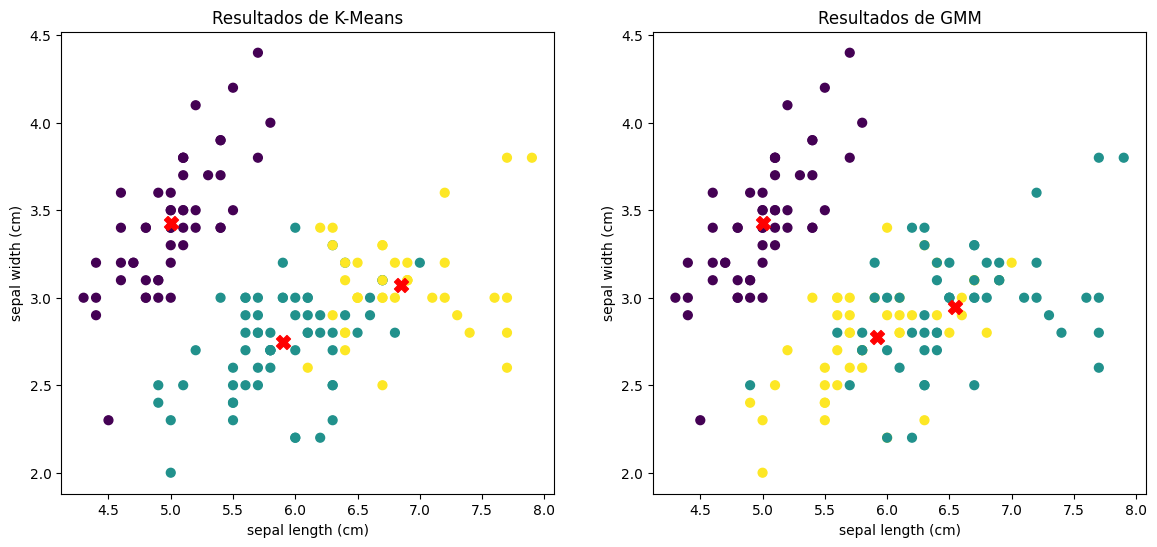

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap="viridis")
plt.title("Resultados de K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
centers_kmeans = kmeans.cluster_centers_
plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c="red", s=100, marker="X")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap="viridis")
plt.title("Resultados de GMM")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
centers_gmm = gmm.means_
plt.scatter(centers_gmm[:, 0], centers_gmm[:, 1], c="red", s=100, marker="X")

plt.show()